# Exploratory Data Analysis

#### Useful insights and trends are being analyzed in the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df1 = pd.read_csv('dataset/customer_data.csv')
df2 = pd.read_csv('dataset/internet_data.csv')
df3 = pd.read_csv('dataset/churn_data.csv')

df = pd.concat([df1, df2, df3], axis=1)

# delete duplicated columns due to concatenation
df = df.loc[:,~df.columns.duplicated()]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Insight 1:

Senior Citizens tend to churn (switch to other provider) more than others.
41.7% Senior citizens switched compared to 23.6% others

In [3]:
citizens = df['SeniorCitizen']==1
tot_others = citizens.value_counts()[0]
tot_senior = citizens.value_counts()[1]

churned_seniors = (df['SeniorCitizen']==1) & (df['Churn']=='Yes')
churned_others = (df['SeniorCitizen']==0) & (df['Churn']=='Yes')

senior_count = churned_seniors.value_counts()[1]
others_count = churned_others.value_counts()[1]

percent_seniors = senior_count*100 / tot_senior
percent_others = others_count*100 / tot_others
percent_seniors, percent_others

(41.68126094570928, 23.610169491525422)

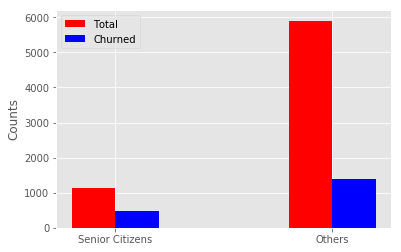

In [4]:
# Visualizing observation 1
ind = np.arange(2)
width = 0.2

fig = plt.figure()
ax = fig.add_subplot(111)

tvals = [tot_senior, tot_others]
bar1 = ax.bar(ind, tvals, width, color='r')

cvals = [senior_count, others_count]
bar2 = ax.bar(ind+width, cvals, width, color='b')

ax.set_ylabel('Counts')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(('Senior Citizens', 'Others'))
ax.legend((bar1[0], bar2[0]), ('Total', 'Churned'))

plt.show()


### Insight 2:
Surprisingly, customers with Fiber optic internet service tend to churn the most, followed by those with DSL and the least being those without any Internet Service. Possibly due to costs!

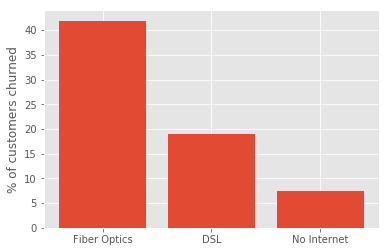

In [5]:
counts = df['InternetService'].value_counts()
fiber = counts[0]
dsl = counts[1]
none = counts[2]

fiber_churn = (df['InternetService']=='Fiber optic') & (df['Churn']=='Yes')
dsl_churn = (df['InternetService']=='DSL') & (df['Churn']=='Yes')
none_churn = (df['InternetService']=='No') & (df['Churn']=='Yes')

fiber_count = fiber_churn.value_counts()[1]
dsl_count = dsl_churn.value_counts()[1]
none_count = none_churn.value_counts()[1]

pct_fiber = fiber_count*100/fiber
pct_dsl = dsl_count*100/dsl
pct_none = none_count*100/none

plt.bar(['Fiber Optics', 'DSL', 'No Internet'], [pct_fiber, pct_dsl, pct_none])
plt.ylabel('% of customers churned')
plt.show()

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)